## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados
### Bruno Pimentel dos Reis

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import warnings
warnings.simplefilter("once")
warnings.filterwarnings("ignore", category=DeprecationWarning)

#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet
#!pip install yellowbrick=="0.9.0" --quiet
#!pip install numpy=="1.16.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.1.1
Usando seaborn 0.10.1
Usando scipy 1.5.2
Usando yellowbrick 1.2
Usando numpy 1.19.1


In [3]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [4]:
# solução
enem = pd.read_csv('./input/MICRODADOS_ENEM_2017.csv',sep=';',encoding='iso-8859-1',
                   usecols = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_COMP1",
                              "NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4", "NU_NOTA_COMP5"])


In [5]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [6]:
enem.shape

(6731341, 9)

In [7]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [8]:
# solução
todas_as_notas = ['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']


In [9]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [10]:
# solução
enem = enem.dropna()
enem.head()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000


In [11]:
enem['NU_NOTA_MT'].head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [12]:
# solução e impressão
enem['nota_total'] = enem.sum(axis=1)
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500


count   4426755.000
mean       2592.747
std         395.990
min           0.000
25%        2330.700
50%        2569.300
75%        2839.500
max        4276.200
Name: nota_total, dtype: float64


Text(0.5, 1.0, 'Histograma nota_total')

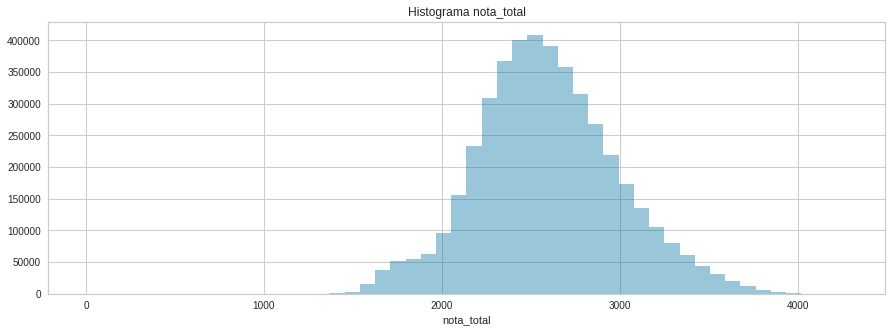

In [13]:
# solução histograma e descrição
print(enem['nota_total'].describe())


import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
ax = sns.distplot(enem['nota_total'],norm_hist=False,kde=False)
ax.set_title('Histograma nota_total')

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição
count   44268.000
mean     2594.186
std       396.483
min         0.000
25%      2330.475
50%      2572.800
75%      2841.625
max      4198.900
Name: nota_total, dtype: float64


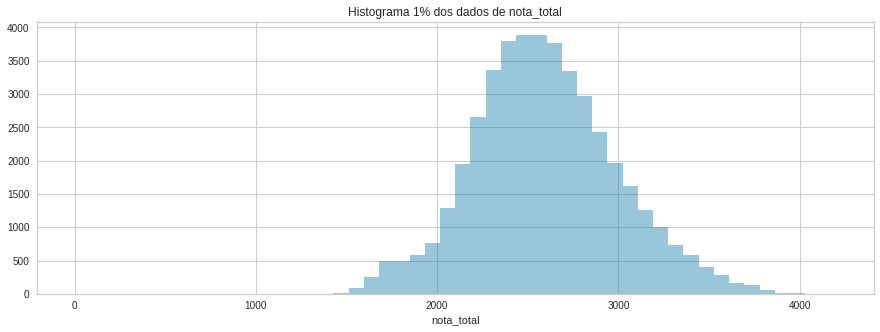

In [14]:
import matplotlib.pyplot as plt

# solução sua função de sampling

def eda_sample(enem):
    # seed
    SEED = 745

    # 1% de sample em enem_eda
    print("Enem EDA sampling tem a distribuição")
    enem_eda = enem.sample(frac=0.01,random_state = SEED)
    
    # descreva a nota_total
    print(enem_eda['nota_total'].describe())
    
    # plote o histograma da nota_total e mostre com plt.show()
    plt.figure(figsize=(15,5))
    ax = sns.distplot(enem_eda['nota_total'],norm_hist=False,kde=False)
    ax.set_title('Histograma 1% dos dados de nota_total')
    plt.show()
    return enem_eda

enem_eda = eda_sample(enem)

# RESPOSTA

Sim a média, mediana e desvio padrão de 1% dos valores é bem representativa à todos os dados, são valores muito próximos em todos os casos.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [15]:
# solução
todas_as_notas.append('nota_total')

In [16]:
correlacoes=enem_eda.corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.610,0.568,0.553,0.342,0.317,0.386,0.379,0.350,0.731
NU_NOTA_CH,0.610,1.000,0.707,0.571,0.396,0.357,0.436,0.425,0.391,0.792
NU_NOTA_LC,0.568,0.707,1.000,0.547,0.443,0.371,0.458,0.448,0.398,0.777
NU_NOTA_MT,0.553,0.571,0.547,1.000,0.361,0.330,0.397,0.389,0.352,0.763
NU_NOTA_COMP1,0.342,0.396,0.443,0.361,1.000,0.771,0.832,0.862,0.594,0.726
NU_NOTA_COMP2,0.317,0.357,0.371,0.330,0.771,1.000,0.859,0.795,0.634,0.694
NU_NOTA_COMP3,0.386,0.436,0.458,0.397,0.832,0.859,1.000,0.866,0.674,0.774
NU_NOTA_COMP4,0.379,0.425,0.448,0.389,0.862,0.795,0.866,1.000,0.653,0.760
NU_NOTA_COMP5,0.350,0.391,0.398,0.352,0.594,0.634,0.674,0.653,1.000,0.675
nota_total,0.731,0.792,0.777,0.763,0.726,0.694,0.774,0.760,0.675,1.000


In [17]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [18]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes['nota_total']

In [19]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.731
NU_NOTA_CH      0.792
NU_NOTA_LC      0.777
NU_NOTA_MT      0.763
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.694
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.760
NU_NOTA_COMP5   0.675
nota_total      1.000
Name: nota_total, dtype: float64


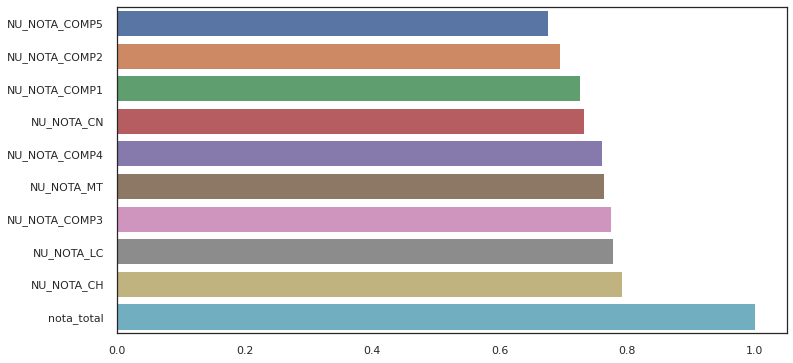

In [20]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr=dados.sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [21]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos

interesse = pd.DataFrame({'NU_NOTA_MT':enem_eda['NU_NOTA_MT'],
         'NU_NOTA_LC':enem_eda['NU_NOTA_LC'],
         'nota_total':enem_eda['nota_total']})
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [22]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    SEED = 42367
    
    # train_test_split
    X = pd.DataFrame(dados.iloc[:,:dados.shape[1]-1])
    y = pd.Series(dados.iloc[:,-1])
    train_x,test_x,train_y,test_y = train_test_split(X,y, random_state = SEED)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [23]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706174


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    
    # calcule o r2_score com os dados de teste
    from sklearn.metrics import r2_score
    r2_score = r2_score(test_y,test_pred)
    
    # calcule a predição e os dois tipos de erros
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    
    test_pred = model.predict(test_x)
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [26]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.769231147198833
mse 36308.8921022768
mae 142.102755998379


LinearRegression()

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

    1- O erro médio absoluto é uma métrica para mostrar o quão distante o modelo ficou da linha identidade de um modelo linear perfeito, neste caso ele está muito distante mesmo ao se considerar o elevado desvio padão das notas dos candidatos.
    2- Apesar do erro médio absoluto ser alto, seu coeficiente de determinação de ~0.77 demonstra que o modelo obteve algum nivel predição assertivo

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

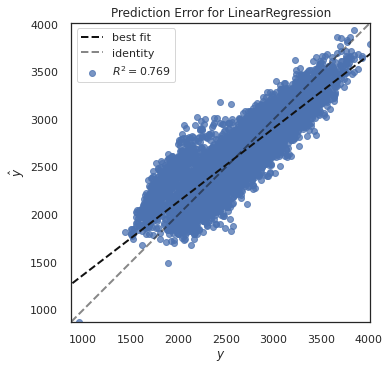

In [27]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

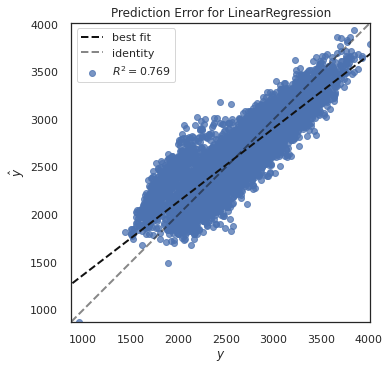

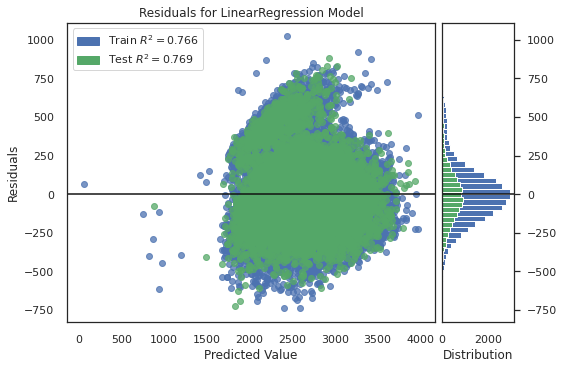

In [28]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [29]:
NU_NOTAS=[correlacoes['nota_total'].sort_values(ascending=True).index[i] for i in range(10)]
NU_NOTAS

['NU_NOTA_COMP5',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP1',
 'NU_NOTA_CN',
 'NU_NOTA_COMP4',
 'NU_NOTA_MT',
 'NU_NOTA_COMP3',
 'NU_NOTA_LC',
 'NU_NOTA_CH',
 'nota_total']

In [30]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_COMP5' 'NU_NOTA_COMP2' 'NU_NOTA_COMP1' 'NU_NOTA_CN'
 'NU_NOTA_COMP4' 'NU_NOTA_MT' 'NU_NOTA_COMP3' 'NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 1.0
mse 1.1613197099386648e-23
mae 2.8127913138831023e-12


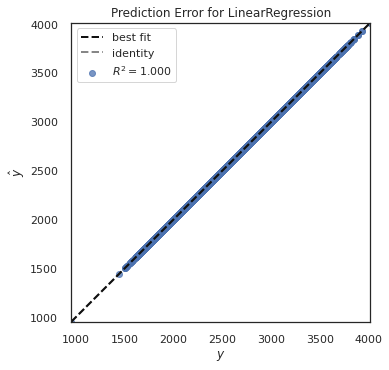

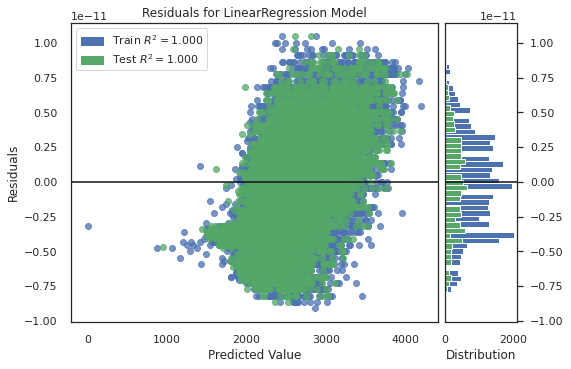

In [31]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

regressao_completa_para(NU_NOTAS)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_COMP2' 'NU_NOTA_COMP1' 'NU_NOTA_CN' 'NU_NOTA_COMP4' 'NU_NOTA_MT'
 'NU_NOTA_COMP3' 'NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.9929379014409435
mse 1111.1420431480803
mae 26.289560074408048


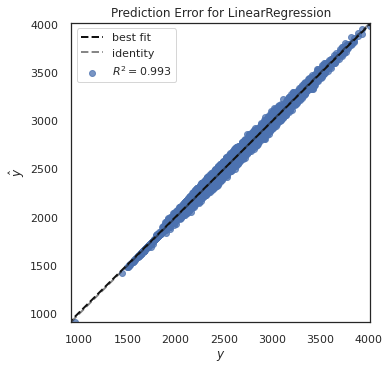

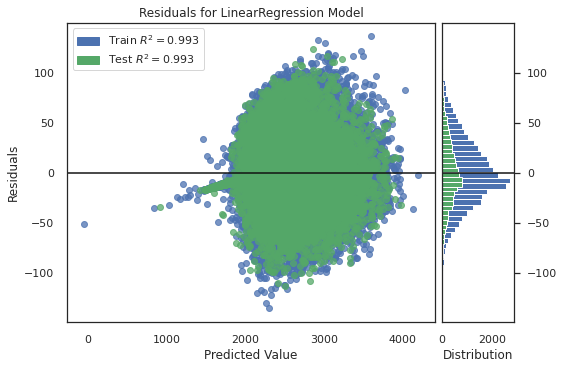

In [32]:
# solução 2: teste outra combinação
regressao_completa_para(NU_NOTAS[1:10])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 7) (33201,) (11067, 7) (11067,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_CN' 'NU_NOTA_COMP4' 'NU_NOTA_MT' 'NU_NOTA_COMP3'
 'NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.9892138913435808
mse 1697.0732863450573
mae 32.64089571284653


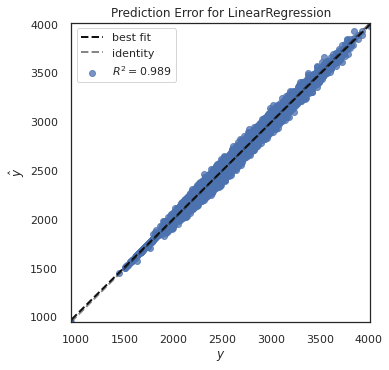

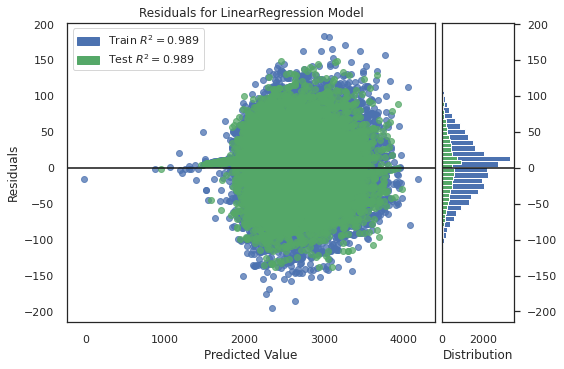

In [33]:
# solução 3: teste outra combinação
regressao_completa_para(NU_NOTAS[2:10])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_COMP4' 'NU_NOTA_MT' 'NU_NOTA_COMP3' 'NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.968202172476979
mse 5003.031711627671
mae 56.34487847052221


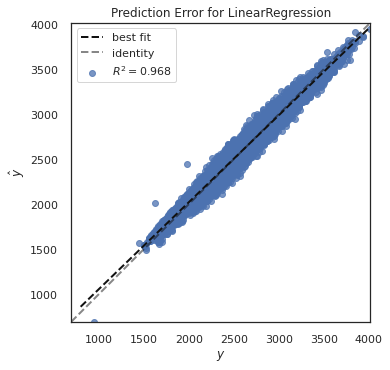

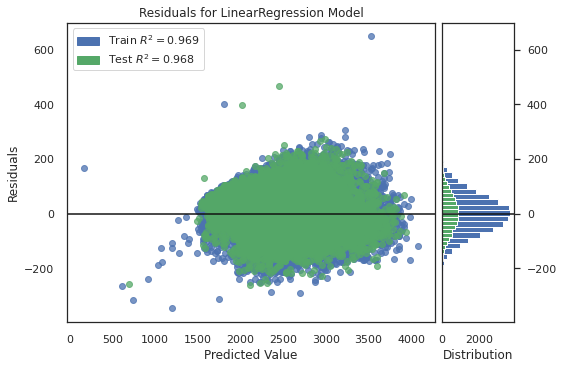

In [34]:
# solução 4: teste outra combinação
regressao_completa_para(NU_NOTAS[4:10])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_COMP3' 'NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.8917247180109095
mse 17035.90187048675
mae 103.4002002892756


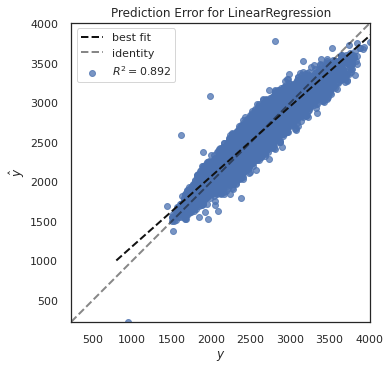

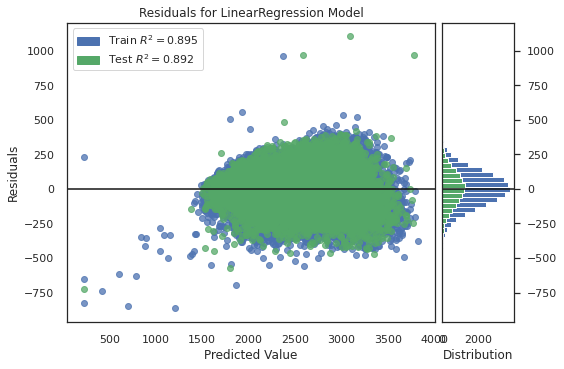

In [35]:
# solução 5: teste outra combinação
regressao_completa_para(NU_NOTAS[6:10])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.7176403748611258
mse 44426.12180440178
mae 159.3360714790735


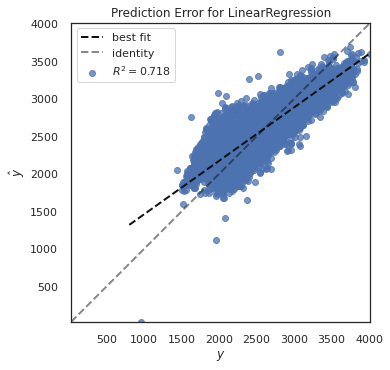

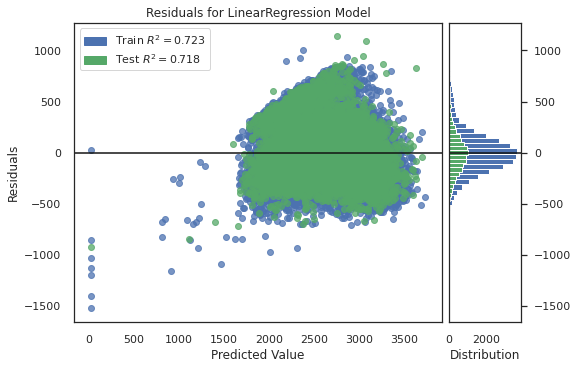

In [36]:
# solução 6: teste outra combinação
regressao_completa_para(NU_NOTAS[7:10])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 1) (33201,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.62014651010151
mse 59765.68853198293
mae 186.17703266363387


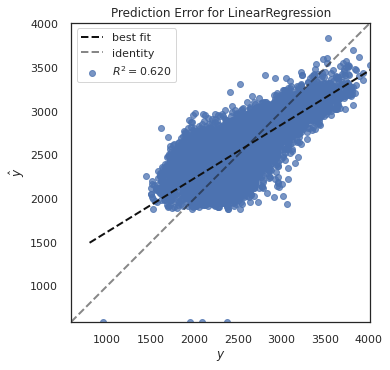

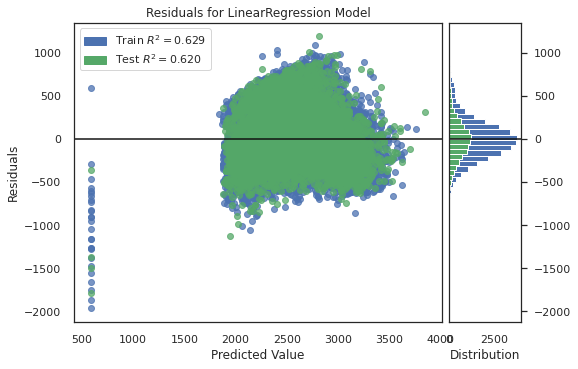

In [37]:
# solução 7: teste outra combinação
regressao_completa_para(NU_NOTAS[8:10])

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706174
********************************************************************************
r2 score 0.925075260832693
mse 11788.56781231625
mae 86.18740233062171


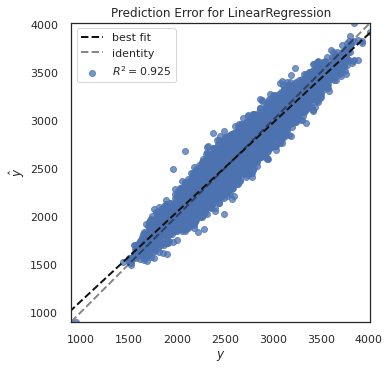

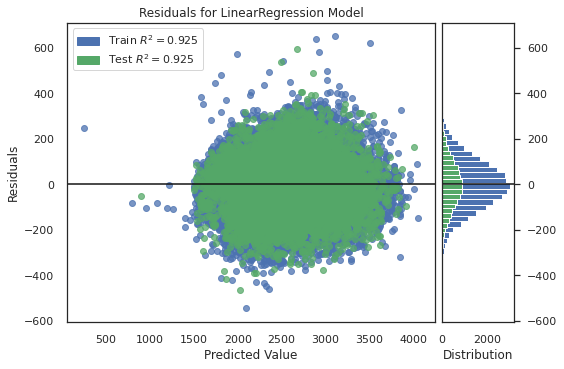

In [38]:
# solução

regressao_completa_para(['NU_NOTA_LC','NU_NOTA_COMP3','NU_NOTA_MT','nota_total'])

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [39]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista
    modelos = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor()]

    return modelos

In [40]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [41]:
# solução

def escolhe_dados(dados, colunas):
    
    # extraia as colunas
    X = pd.DataFrame(dados[colunas])
    
    # faça o split
    SEED = 42
    train_x, test_x, train_y, test_y  = split(X)
    
    # plote o histograma de train_y
    train_y.hist()
    plt.show()
    
    return train_x, test_x, train_y, test_y

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 106.62363383625484


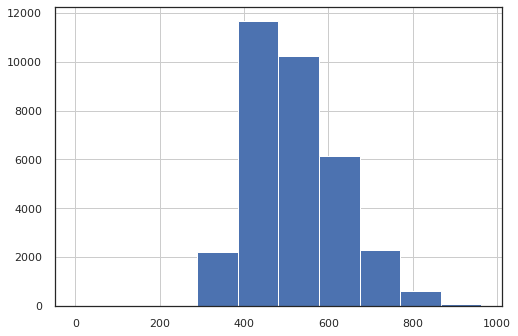

In [42]:
train_x, test_x, train_y, test_y = escolhe_dados(enem_eda,['NU_NOTA_LC','NU_NOTA_COMP3','NU_NOTA_MT'])

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [43]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    
    tic = time.time()
    
    # treine seu modelo 
    modelo.fit(train_x,train_y)
    
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)
        
    # calcule o mse
    mse = mean_squared_error(test_y, test_pred)
    
    # calcule o mae
    mae = mean_absolute_error(test_y, test_pred)
    
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706174


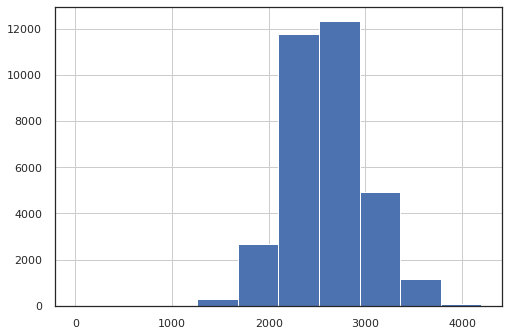

In [44]:
train_x, test_x, train_y, test_y = escolhe_dados(enem_eda,['NU_NOTA_LC','NU_NOTA_COMP3','NU_NOTA_MT','nota_total'])

In [45]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo        
        # use o make_pipeline ou crie um Pipeline
        pipe = make_pipeline(StandardScaler(),modelo)
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706174


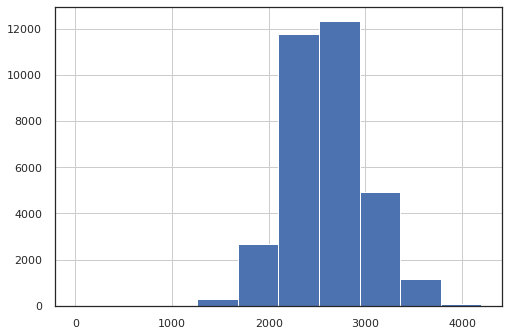

Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) 11788.567812316249 86.18740233062174
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())]) 11786.673810163153 86.22345492148199
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 11788.547734550786 86.18754819236582
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())]) 22953.083460513237 119.27103551097859
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())]) 13069.166872144478 90.3015557724165


,modelo,mse,mae,tempo_de_treino
0,LinearRegression(),11788.568,86.187,0.072
1,Lasso(),11786.674,86.223,0.214
2,Ridge(),11788.548,86.188,0.245
3,DecisionTreeRegressor(),22953.083,119.271,0.465
4,"(DecisionTreeRegressor(max_features='auto', ra...",13069.167,90.302,54.854


In [46]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

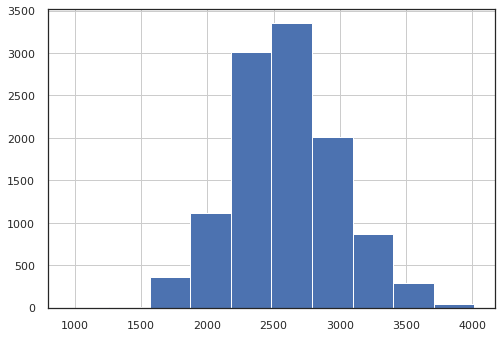

In [47]:
# solução: histograma
test_y.hist()
plt.show()

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [48]:
# solução

def top_p(serie, p = 0.75):
    
    # calcule o quantil p
    quant = serie.quantile([p])
    print("quantile encontrado", quant)
    
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = pd.Series([])
    for i in serie.values:
        if i < quant.values[0]:       
            y = y.append([pd.Series(0)])
        else:
            y = y.append([pd.Series(1)])            
    return y

In [49]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
print(top_25)
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 0.750   7.750
dtype: float64
[0 0 0 0 0 0 0 1 1 1]


In [50]:
# teste do top 10%
top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
print(top_10)
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 0.900   9.100
dtype: float64
[0 0 0 0 0 0 0 0 0 1]


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [51]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 0.750   2837.850
Name: nota_total, dtype: float64


0.2500225896810337

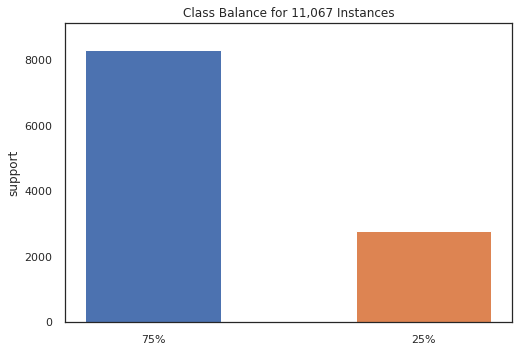

<AxesSubplot:title={'center':'Class Balance for 11,067 Instances'}, ylabel='support'>

In [52]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

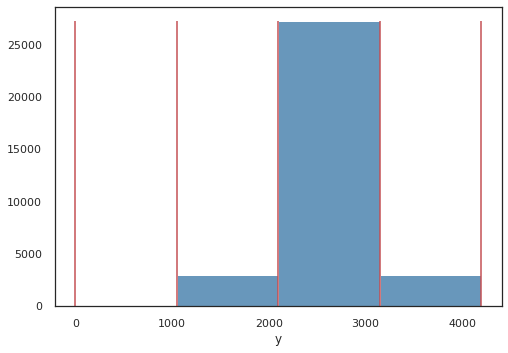

<AxesSubplot:xlabel='y'>

In [53]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [54]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
# solução

def gera_classificadores():
    modelos = [DummyClassifier(),LogisticRegression(),RidgeClassifier(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=10),SVC()]
    return modelos

In [56]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [57]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    np.random.seed(SEED)
    
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.iloc[:,dados.columns != 'top_p']
    print(X.columns)
    
    # defina y como somente a coluna top_p
    y = dados['top_p']
    
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X,y,stratify=y)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [58]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total']).values
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 0.750   2841.625
Name: nota_total, dtype: float64


<ipython-input-58-295236a0e27b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = top_p(interesse['nota_total']).values


Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


## Pergunta: implemente o treino e o teste do classificador

In [59]:
# solução:

import time
from sklearn.metrics import accuracy_score

def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    
    # treine o pipeline
    pipe.fit(train_x,train_y)
    
    tac = time.time()
    tempo_de_treino = tac - tic
    
    # calcule a accuracy_score
    test_pred = pipe.predict(test_x)
    accuracy_score2 = accuracy_score(test_y,test_pred)
    print("Resultado", nome, accuracy_score2)

    return accuracy_score2, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [60]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados.iloc[:, dados.columns != 'nota_total']# selecione somente as colunas especificas de dados
    nota_total = dados['nota_total'] # somente a coluna nota_total
    interesse['top_p'] = top_p(nota_total,p).values # defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 0.750   2841.625
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


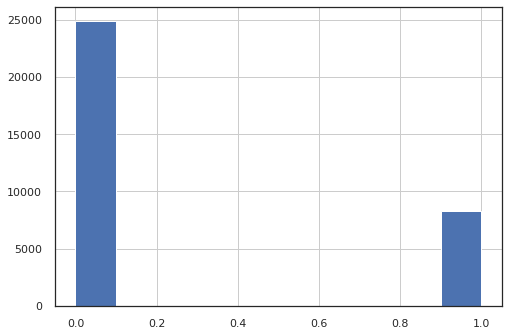

In [61]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [62]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 0.750   2841.625
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


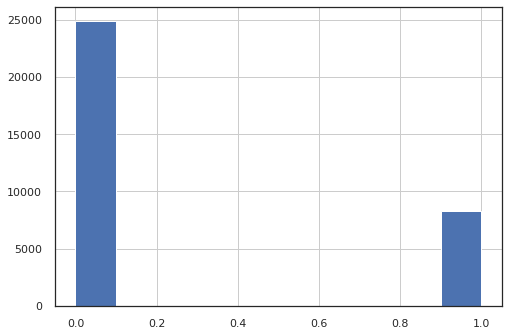

/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Resultado DummyClassifier 0.6217583807716635
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9072919490376796
Resultado RandomForestClassifier 0.92662871600253
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.622,0.159
LogisticRegression,0.937,1.165
RidgeClassifier,0.920,0.505
DecisionTreeClassifier,0.907,0.246
RandomForestClassifier,0.927,0.924
SVC,0.937,38.668


In [63]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.800   2915.700
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2000542152344809


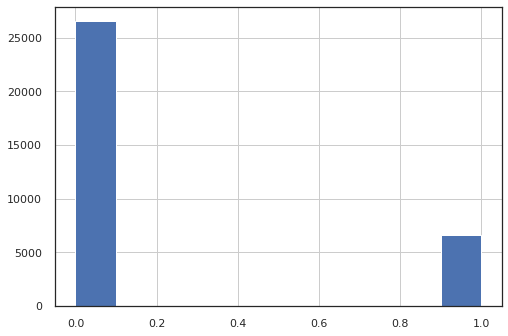

/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Resultado DummyClassifier 0.6796783229420801
Resultado LogisticRegression 0.9454233306225716
Resultado RidgeClassifier 0.9288876841059004
Resultado DecisionTreeClassifier 0.9208457576579019
Resultado RandomForestClassifier 0.9378331977952471
Resultado SVC 0.9455136893467064


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.680,0.051
LogisticRegression,0.945,0.512
RidgeClassifier,0.929,0.331
DecisionTreeClassifier,0.921,0.304
RandomForestClassifier,0.938,0.770
SVC,0.946,25.190


In [64]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda, p = 0.8) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.900   3119.000
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.10002710761724044


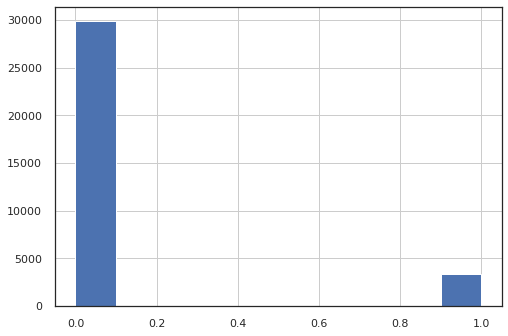

/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Resultado DummyClassifier 0.8219029547302792
Resultado LogisticRegression 0.9709044908285895
Resultado RidgeClassifier 0.9278937381404174
Resultado DecisionTreeClassifier 0.9571699647600976
Resultado RandomForestClassifier 0.9649408150356917
Resultado SVC 0.9705430559320503


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.822,0.045
LogisticRegression,0.971,0.356
RidgeClassifier,0.928,0.395
DecisionTreeClassifier,0.957,0.286
RandomForestClassifier,0.965,0.762
SVC,0.971,10.399


In [65]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.9) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.950   3290.795
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04996837444655281


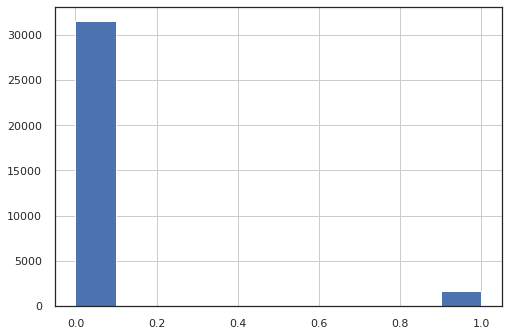

/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Resultado DummyClassifier 0.908105177554893
Resultado LogisticRegression 0.9793078521731273
Resultado RidgeClassifier 0.9500316255534472
Resultado DecisionTreeClassifier 0.9720791542423421
Resultado RandomForestClassifier 0.978494623655914
Resultado SVC 0.9793982108972621


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.908,0.030
LogisticRegression,0.979,0.440
RidgeClassifier,0.950,0.077
DecisionTreeClassifier,0.972,0.247
RandomForestClassifier,0.978,0.635
SVC,0.979,6.262


In [66]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.95) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.990   3588.700
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


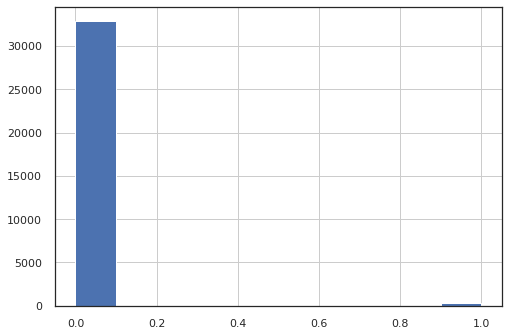

/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Resultado DummyClassifier 0.9803017981386103
Resultado LogisticRegression 0.9943074003795066
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9911448450347881
Resultado RandomForestClassifier 0.9932230956898889
Resultado SVC 0.9942170416553718


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.980,0.028
LogisticRegression,0.994,0.334
RidgeClassifier,0.990,0.074
DecisionTreeClassifier,0.991,0.212
RandomForestClassifier,0.993,0.474
SVC,0.994,1.710


In [67]:
# solução top 1%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.99) 
notas = resultados[['accuracy_score','tempo_de_treino']]
notas

quantile encontrado 0.250   2330.475
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


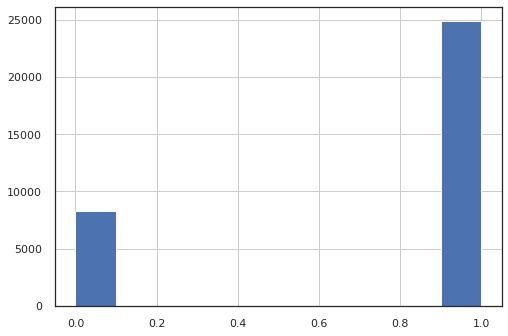

/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Resultado DummyClassifier 0.6264570344266739
Resultado LogisticRegression 0.9208457576579019
Resultado RidgeClassifier 0.9033161651757478
Resultado DecisionTreeClassifier 0.8882262582452336
Resultado RandomForestClassifier 0.9034065238998825
Resultado SVC 0.9225625734164633


,accuracy_score,tempo_de_treino,pipe
tipo,,,
DummyClassifier,0.626,0.028,"(StandardScaler(), DummyClassifier())"
LogisticRegression,0.921,0.240,"(StandardScaler(), LogisticRegression())"
RidgeClassifier,0.903,0.090,"(StandardScaler(), RidgeClassifier())"
DecisionTreeClassifier,0.888,0.296,"(StandardScaler(), DecisionTreeClassifier())"
RandomForestClassifier,0.903,0.812,"(StandardScaler(), (DecisionTreeClassifier(max..."
SVC,0.923,31.563,"(StandardScaler(), SVC())"


In [68]:
# solução bottom 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda,0.25) 
notas = resultados[['accuracy_score','tempo_de_treino','pipe']]
notas

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 0.750   2841.625
Name: nota_total, dtype: float64
Index(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3'], dtype='object')
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


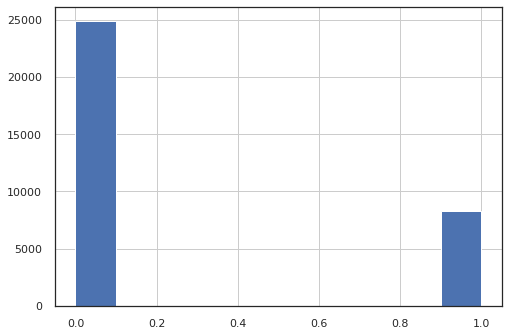

/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Resultado DummyClassifier 0.6217583807716635
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9072919490376796
Resultado RandomForestClassifier 0.92662871600253
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino,pipe
tipo,,,
DummyClassifier,0.622,0.032,"(StandardScaler(), DummyClassifier())"
LogisticRegression,0.937,0.199,"(StandardScaler(), LogisticRegression())"
RidgeClassifier,0.920,0.042,"(StandardScaler(), RidgeClassifier())"
DecisionTreeClassifier,0.907,0.184,"(StandardScaler(), DecisionTreeClassifier())"
RandomForestClassifier,0.927,0.865,"(StandardScaler(), (DecisionTreeClassifier(max..."
SVC,0.937,23.846,"(StandardScaler(), SVC())"


In [69]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y , resultados = analisa_classificacao(enem_eda) 
notas = resultados[['accuracy_score','tempo_de_treino','pipe']]
notas

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [70]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9371103280021686


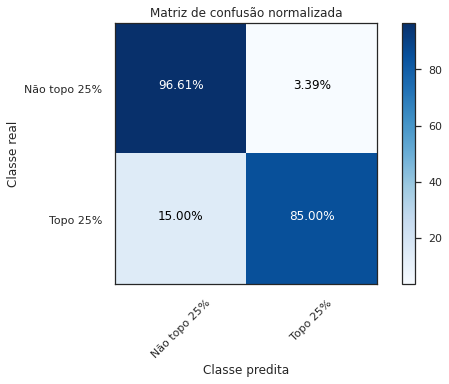

In [71]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9374717628987078


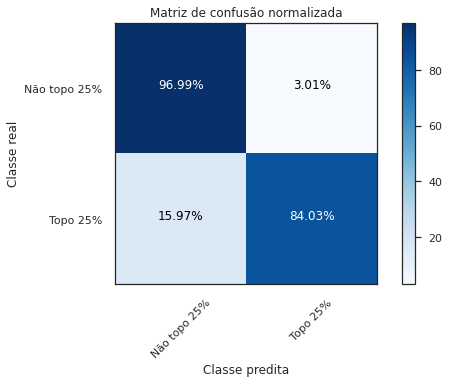

In [72]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [73]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


### Estava demorando muito o processamento com tantos dados, extrai uma amostra aleatória de 1%

Enem EDA sampling tem a distribuição
count   43825.000
mean     2594.743
std       395.482
min       340.000
25%      2333.900
50%      2567.400
75%      2839.400
max      4127.000
Name: nota_total, dtype: float64


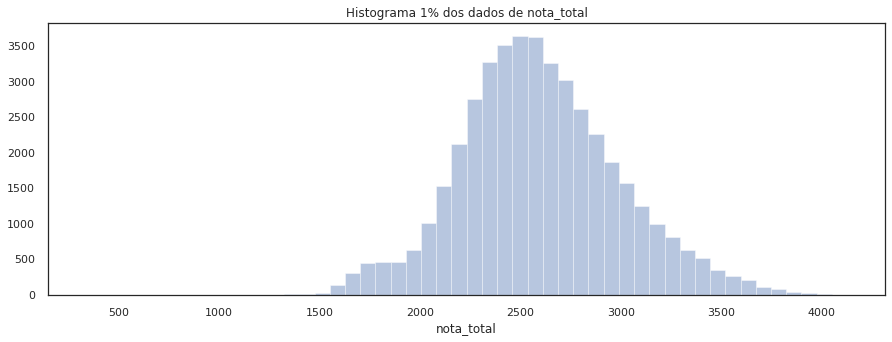

43825

In [74]:

enem_validacao = eda_sample(enem_validacao)
len(enem_validacao)

## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [75]:
def separa_dados_de_classificacao_para_validacao(dados):
    # selecione as 3 colunas
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]  
    # calcule o top 25% como 1 o bottom 75% como 0
    y = top_p(dados.iloc[:,-1]) 
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [76]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X,y = separa_dados_de_classificacao_para_validacao(dados)
    
    scores = cross_val_score(modelo,X,y,verbose = 1, n_jobs = -1) # cv = 5 , por padrão
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 0.750   2839.400
Name: nota_total, dtype: float64
Média da validação 0.25001711351968053


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.8s finished


Acurácia entre [93.51,93.52]
Acurácia do modelo em teste 0.9351739874500856


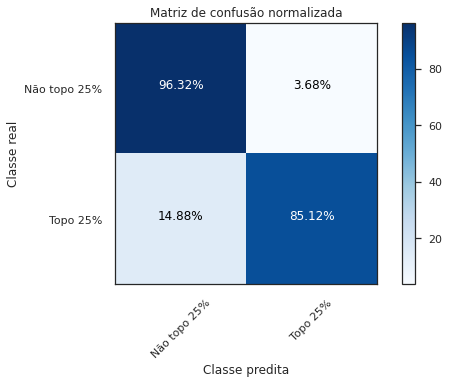

In [77]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [78]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")

        # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha    
        parcial = X.iloc[:,:X.shape[1]-1].sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.iloc[:,:X.shape[1]-1].sum(axis=1) # some por coluna
        y_pred_true_false = parcial > self.top_25_quantile # compare a soma parcial com o self.top25_quantile
        y_pred = y_pred_true_false # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 0.750   2839.400
Name: nota_total, dtype: float64
Média da validação 0.25001711351968053


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


Acurácia entre [89.60,89.61]
top 25 quantile é 1126.20
Acurácia do modelo em teste 0.8959041642897889


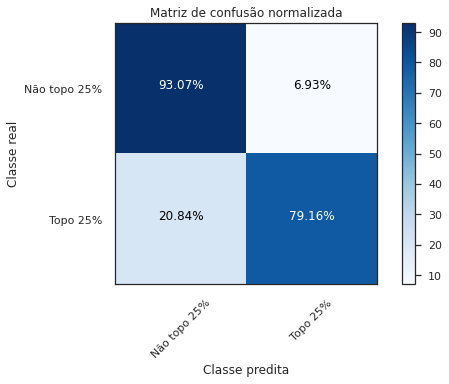

In [79]:
enem_validacao_ = enem_validacao[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3","nota_total"]]
treina_e_valida_modelo_de_classificacao(enem_validacao_, HeuristicaTop25())

quantile encontrado 0.750   2839.400
Name: nota_total, dtype: float64
Média da validação 0.25001711351968053


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
/home/oppenheimer/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Acurácia entre [62.56,62.58]
Acurácia do modelo em teste 0.6283399885909868


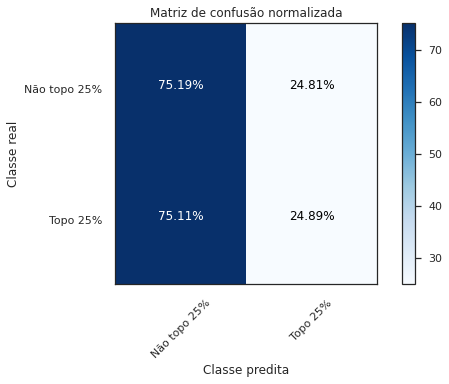

In [80]:
enem_validacao_ = enem_validacao[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3","nota_total"]]
treina_e_valida_modelo_de_classificacao(enem_validacao_, DummyClassifier())

## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

    Sua solução aqui
    Estes ultimos modelos foram utilizados os dados que não foram estudados até então. Logo o modelo heurística que corresponde a classe **HeuristicaTop25** no qual foi uma **simples soma por colunas(não por linhas)** junto com um binning sobre top25% e obteve acurácia aproximadamente de **90%**. Além disso, **identificou bem as notas** que não estavam no top 25% (**93.75%**). Com isso, o modelo **DummyClassifier** usamos também como baseline que resultou em acurácia de 62.56%.
    Por fim, o modelo logisticRegression superou nossa baseline com acurácia de quase 94%.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Sua solução aqui
    Caso um aluno ou aluna vá apenas para o primeiro dia de prova que consiste em linguagens e códigos, ciências humanas e a redação. Além disso, supondo apenas que resolveu as questões objetivas. Temos as três colunas: ['NU_NOTA_CH','NU_NOTA_LC','nota_total'], sendo assim, calculando a soma da diferença entre as colunas ['NU_NOTA_CH','NU_NOTA_LC'] podemos obter uma acurácia de 78%.

In [81]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[['NU_NOTA_CH','NU_NOTA_LC']]
    y = top_p(dados.iloc[:,-1])
    print("Média da validação", y.mean())
    return X, y

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    X,y = separa_dados_de_classificacao_para_validacao(dados)
    
    scores = cross_val_score(modelo,X,y,verbose = 1, n_jobs = -1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

class HeuristicaPrimeiroDia:
    
    def fit(self, X, y = None):
        parcial = X.diff().sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.diff().sum(axis=1)
        y_pred_true_false =  parcial > self.top_25_quantile
        y_pred = y_pred_true_false
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 0.750   2839.400
Name: nota_total, dtype: float64
Média da validação 0.25001711351968053


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Acurácia entre [77.77,77.79]
top 25 quantile é 134.20
Acurácia do modelo em teste 0.7778665145464917


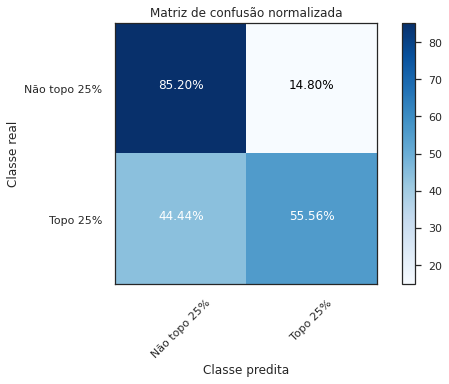

In [82]:
enem_eda_primeiro_dia_sem_redacao = enem_validacao[['NU_NOTA_CH','NU_NOTA_LC','nota_total']]
treina_e_valida_modelo_de_classificacao(enem_eda_primeiro_dia_sem_redacao, HeuristicaPrimeiroDia())

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    Sua solução aqui
    A primeira pergunta a se fazer é: Para qual curso/universidade a bolsa se destina? pois não pode-se basear a predição das notas do modelo top25%, mas também o curso, pois há formações em universidades bem concorridas em todo o brasil, assim partidindo do modelo top25% podemos disponibilizar este para uma filtragem de alunos e alunas e a partir daí a universidade usar os resultados do modelo para redirecionar as bolsas de com maior chance de sucesso.

In [86]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[['NU_NOTA_CH','NU_NOTA_LC']]
    y = top_p(dados.iloc[:,-1])
    print("Média da validação", y.mean())
    return X, y

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    X,y = separa_dados_de_classificacao_para_validacao(dados)
    
    scores = cross_val_score(modelo,X,y,verbose = 1, n_jobs = -1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

class HeuristicaPrimeiroDia:
    
    def fit(self, X, y = None):
        parcial = X.diff().sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.diff().sum(axis=1)
        y_pred_true_false =  parcial > self.top_25_quantile
        y_pred = y_pred_true_false
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 0.750   2839.400
Name: nota_total, dtype: float64
Média da validação 0.25001711351968053


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Acurácia entre [77.77,77.79]
top 25 quantile é 134.20
Acurácia do modelo em teste 0.7778665145464917


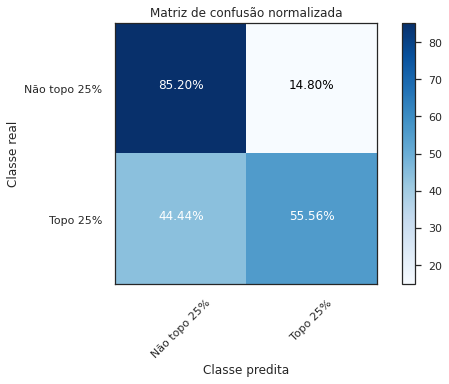

In [87]:
enem_eda_primeiro_dia_sem_redacao = enem_validacao[['NU_NOTA_CH','NU_NOTA_LC','nota_total']]
treina_e_valida_modelo_de_classificacao(enem_eda_primeiro_dia_sem_redacao, HeuristicaPrimeiroDia())

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!